array([[<Axes: title={'center': 'magnetism'}>]], dtype=object)

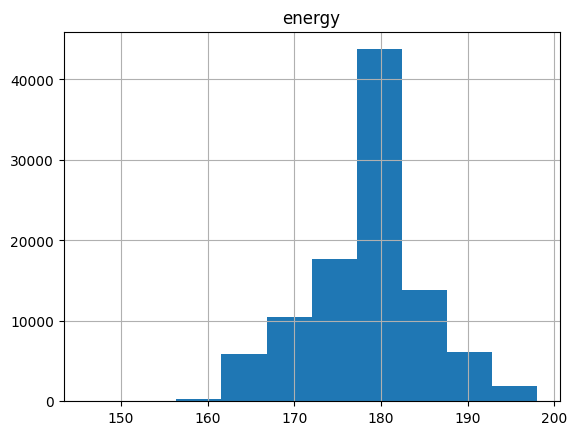

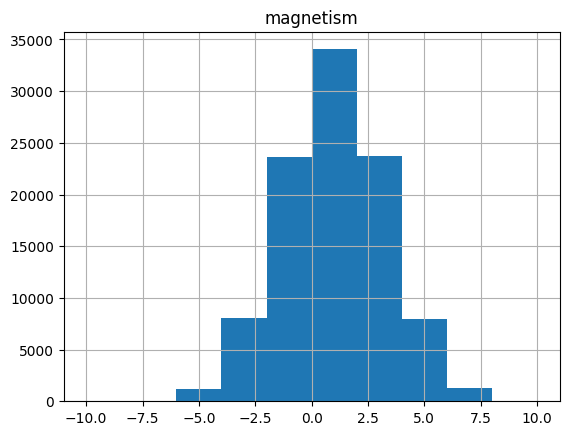

In [1]:
import pandas as pd

df = pd.read_csv("output.txt")
df.hist("energy")
df.hist("magnetism")